<a href="https://colab.research.google.com/github/WagnerLopesCardozo/BioInformatica_Genomica/blob/main/Projeto_Estudo_Colaborativo_Biotecnologia_Redes_Neurais_Artificiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Estudo Colaborativo Sobre Biotecnologia Com o Uso de Redes Neurais Artificiais

Olá Thayanne, tudo bem? Espero que esteja bem!

Fiz algumas alterações no seu código, com o objetivo de melhorar o seu código, no geral conforme você me solicitou está muito bom seu código, então fiz o seguinte:

* Em relação as bibliotecas instanciadas estão corretas pois as bibliotecas TensorFlow que trabalha em conjunto com Keras e mais a Scikit-Learn são as mais utilizadas no Python, mas sugiro tentar usar também separadamente a PyTorch pois também apresenta ótimos resultados no uso de redes Neurais.

* Criei no seu código o front end para ficar com uma interface mais simpática usando a biblioteca do Google Colab file, então ao executar o código dever ser criado um botão que ao clicar nele você escolhe os dois arquivos .CSV por meio de uma tela Windows.

* Quanto a arquiterura da rede neural esta é a LeNet então adicionaei mais camadas internas com mais neurônios e também aumentei o número de épocas de 10 para 100.

* Bem tem que saber melhor o que você está querendo quanto aos resultados se é uma predição binária (0 ou 1, sim ou não, é ou não é) ou multiclasses (não tem câncer, tem câncer benigno, tem câncer maligno ), já são três classes, logo multiclasses.

* Seria bom também testar os resultados finais com outra arquitetura de redes neurais como por exemplo a DenseNet, ReNet, AlexNet, InterceptonNet ou VGGNet, vendo também a mais adequada segundo literatura para trabalhar com sequênciamento biológico, pois umas são mais adequadas para imagem médica.

* Acrescentei também ao código a matriz de confusão que relaciona os verdadeiros positivos, verdadeiros negativos, falços positivos e falços negativos este gráfico é muito útil para ter noção do desempenho da rede neural para as classificações preditivas.

* Acrescentei também as medidas estatísticas de desempenho que são acurácia, acurácia balanceada, precisão, F1 score e recall ou revocação ou sensibilidade.

* Bem agora tem que entrar com seus dados e vê o resultado final e observar se o código não vai dar nenhum erro ou mesmo se não der erro de execução, os resultados exibidos no output são os esperados e validados pela fundamentação da literatura.

Espero ter contribuido e ajudado.

#Seu código original ( não fiz alterações direto nele para você comparar com os outros códigos que acrescentei as alterações ).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Carregue seus dados genéticos e clínicos em DataFrames do pandas

# Substitua 'genetic_data.csv' e 'clinical_data.csv' pelos nomes dos seus arquivos de dados
genetic_data = pd.read_csv('genetic_data.csv')
clinical_data = pd.read_csv('clinical_data.csv')

# Combine os dados genéticos e clínicos usando um identificador exclusivo
# Suponha que você tenha uma coluna 'ID' em ambos os DataFrames para identificação
merged_data = pd.merge(genetic_data, clinical_data, on='ID')

# Divida os dados em recursos (X) e rótulos (y)
# Suponha que você esteja tentando prever uma variável clínica específica, como 'resultado'
X = merged_data.drop(columns=['ID', 'resultado'])  # Remova colunas de identificação e o rótulo
y = merged_data['resultado']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronize os recursos (isso é importante para redes neurais)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**************************************************************************************************************

# Crie um modelo de rede neural simples
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Saída binária (por exemplo, se é positivo ou negativo)
])

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treine o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

#***************************************************************************************************************

# Avalie o modelo no conjunto de testes
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia do modelo: {accuracy}')

# Use o modelo treinado para fazer previsões
predictions = model.predict(X_test)

# Você pode usar as previsões para análise adicional, como calcular métricas de desempenho


Thaynnara, nesta célula de código estou colocando a sugestão de alguns links com vários datasets no formato de arquivo .CVS no universo da Genomica, sequênciamento biológico e BioInformática que podem ser trabalhados com Redes Neurais Artificiais bem como também artigos da PubMed sobre este assunto.

Segue os links:

* https://healthdata.gov/browse?q=biological&sortBy=relevance

* https://genomics.senescence.info/download.html

* https://healthdata.gov/browse?q=Genome&sortBy=relevance

* https://dash.nichd.nih.gov/explore/dataset

* https://www.kaggle.com/search?q=biological

* https://pubmed.ncbi.nlm.nih.gov/?term=neural+networks+in+bioinformatics+and+biological+sequence&filter=years.2018-2023





#Código com os acréscimos supra citados.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import files  # Importe a biblioteca para carregar arquivos no Google Colab

# Solicite ao usuário o upload dos arquivos genetic_data.csv e clinical_data.csv
uploaded = files.upload()

# Obtenha os nomes dos arquivos carregados
genetic_data_filename = next(iter(uploaded))
clinical_data_filename = next(iter(uploaded))

# Carregue os dados genéticos e clínicos em DataFrames do pandas
genetic_data = pd.read_csv(genetic_data_filename)
clinical_data = pd.read_csv(clinical_data_filename)

# Combine os dados genéticos e clínicos usando um identificador exclusivo
# Suponha que você tenha uma coluna 'ID' em ambos os DataFrames para identificação
merged_data = pd.merge(genetic_data, clinical_data, on='ID')

# Divida os dados em recursos (X) e rótulos (y)
# Suponha que você esteja tentando prever uma variável clínica específica, como 'resultado'
X = merged_data.drop(columns=['ID', 'resultado'])  # Remova colunas de identificação e o rótulo
y = merged_data['resultado']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronize os recursos (isso é importante para redes neurais)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**************************************************************************************************************

# Criei um modelo de rede neural mais densa
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),  # Nova camada interna
    layers.Dense(8, activation='relu'),   # Nova camada interna
    layers.Dense(1, activation='sigmoid')  # Saída binária (por exemplo, se é positivo ou negativo)
])

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treine o modelo com 100 épocas
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

#***************************************************************************************************************

# Avalie o modelo no conjunto de testes
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Converte as probabilidades em previsões binárias

# Exiba a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Exiba um relatório de classificação
class_names = ["Negative", "Positive"]  # Substitua pelos rótulos da sua classe, se necessário
print(classification_report(y_test, y_pred, target_names=class_names))

# Métricas adicionais
balanced_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Acurácia Balanceada: {balanced_acc}')
print(f'Precisão: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')


#Código usando um dataset de câncer de mama da base de dados Wisconsin para testar as alterações feitas extraindo os dados diretamente do endereço internet URL.

Epoch 1/100
12/12 [==============================] - 2s 24ms/step - loss: 0.5852 - accuracy: 0.6923 - val_loss: 0.4331 - val_accuracy: 0.8462
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3495 - accuracy: 0.9231 - val_loss: 0.2371 - val_accuracy: 0.9341
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1846 - accuracy: 0.9588 - val_loss: 0.1320 - val_accuracy: 0.9670
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0945 - accuracy: 0.9808 - val_loss: 0.1012 - val_accuracy: 0.9670
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0609 - accuracy: 0.9863 - val_loss: 0.0894 - val_accuracy: 0.9670
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0476 - accuracy: 0.9890 - val_loss: 0.0873 - val_accuracy: 0.9780
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.9890 - val_loss: 0.0854 - val_accuracy: 0.9670
Epoch 8/100


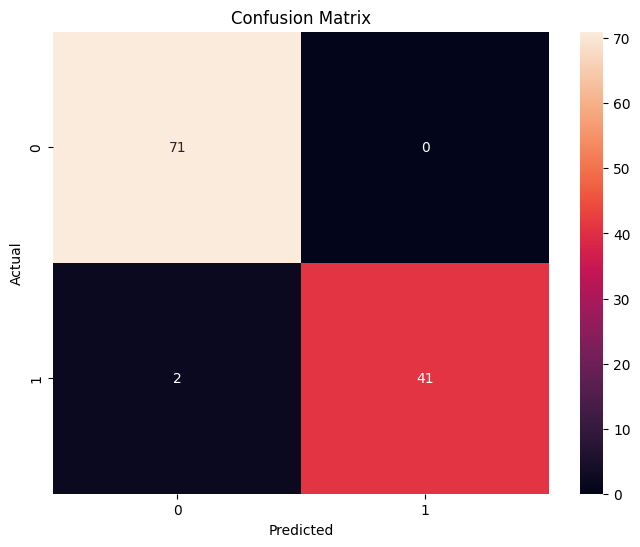

              precision    recall  f1-score   support

     Benigno       0.97      1.00      0.99        71
     Maligno       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Acurácia Balanceada: 0.9767441860465116
Precisão: 1.0
F1 Score: 0.9761904761904763
Recall: 0.9534883720930233


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
import requests
from io import StringIO

# URL do conjunto de dados (Breast Cancer Wisconsin - Diagnostic)
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
response = requests.get(data_url)
data = response.text
data = StringIO(data)

# Colunas do conjunto de dados
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]

# Carregue os dados em um DataFrame do pandas
dataset = pd.read_csv(data, header=None, names=columns)

# Remova a coluna de ID, pois não é informativa para o modelo
dataset.drop("ID", axis=1, inplace=True)

# Mapeie rótulos de diagnóstico (M = Maligno, B = Benigno) para valores binários (1, 0)
dataset["Diagnosis"] = dataset["Diagnosis"].map({"M": 1, "B": 0})

# Divida os dados em recursos (X) e rótulos (y)
X = dataset.drop("Diagnosis", axis=1)
y = dataset["Diagnosis"]

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronize os recursos (isso é importante para redes neurais)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**************************************************************************************************************

# Crie um modelo de rede neural mais densa
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),  # Nova camada interna
    layers.Dense(8, activation='relu'),   # Nova camada interna
    layers.Dense(1, activation='sigmoid')  # Saída binária (por exemplo, se é positivo ou negativo)
])

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treine o modelo com 100 épocas
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

#***************************************************************************************************************

# Avalie o modelo no conjunto de testes
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Converte as probabilidades em previsões binárias

# Exiba a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Exiba um relatório de classificação
class_names = ["Benigno", "Maligno"]
print(classification_report(y_test, y_pred, target_names=class_names))

# Métricas adicionais
balanced_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Acurácia Balanceada: {balanced_acc}')
print(f'Precisão: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')


#Código para fazer o download do arquivo .CSV contendo o dataset de câncer de mamografia Wisconsin ( o arquivo é salvo na computação em nuvem do Google Colab, permitindo o seu download para o processamento local )

In [ ]:
import requests
import os

# URL do conjunto de dados
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Nome do arquivo de destino (você pode alterar o nome, se desejar)
file_name = "wdbc.csv"

# Caminho completo do arquivo de destino (substitua pelo seu caminho desejado)
file_path = "C:\\Users\\Aluno\\Downloads\\" + file_name

# Verifique se o arquivo já existe antes de fazer o download
if not os.path.exists(file_path):
    # Faça o download do arquivo
    response = requests.get(data_url)

    if response.status_code == 200:
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"O arquivo '{file_name}' foi baixado e salvo em '{file_path}'.")
    else:
        print(f"Não foi possível baixar o arquivo. Status code: {response.status_code}")
else:
    print(f"O arquivo '{file_name}' já existe em '{file_path}'. Nenhum download necessário.")


O arquivo 'wdbc.csv' foi baixado e salvo em 'C:\Users\Aluno\Downloads\wdbc.csv'.


#Código para fazer o download do arquivo .CSV contendo o dataset de câncer de mamografia Wisconsin (a diferença que este coloca o arquivo mais na raíz da computação em núvem do Google Colab )

In [ ]:
import requests
import os

# URL do conjunto de dados
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Nome do arquivo de destino (você pode alterar o nome, se desejar)
file_name = "wdbc.csv"

# Diretório de destino (pasta onde você deseja salvar o arquivo)
download_dir = "C:\\Users\\Aluno\\Downloads"  # Substitua pelo diretório desejado

# Crie o diretório de destino, se ele não existir
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# Caminho completo do arquivo de destino
file_path = os.path.join(download_dir, file_name)

# Verifique se o arquivo já existe antes de fazer o download
if not os.path.exists(file_path):
    # Faça o download do arquivo
    response = requests.get(data_url)

    if response.status_code == 200:
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"O arquivo '{file_name}' foi baixado e salvo em '{file_path}'.")
    else:
        print(f"Não foi possível baixar o arquivo. Status code: {response.status_code}")
else:
    print(f"O arquivo '{file_name}' já existe em '{file_path}'. Nenhum download necessário.")


O arquivo 'wdbc.csv' foi baixado e salvo em 'C:\Users\Aluno\Downloads/wdbc.csv'.


#Neste código é feito a solicitação ao usuário do arquivo .CSV que foi feito o download no processamento local por meio de uma tela Windows e após este download e feito o treinamento da rede neural retornando os resultados das medidas de desempenho e matriz de confusão.

Por favor, faça o upload do arquivo CSV:


Saving wdbc.csv to wdbc.csv
Epoch 1/100
12/12 [==============================] - 2s 35ms/step - loss: 0.5400 - accuracy: 0.7857 - val_loss: 0.3621 - val_accuracy: 0.8901
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.2724 - accuracy: 0.9478 - val_loss: 0.1983 - val_accuracy: 0.9341
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1366 - accuracy: 0.9670 - val_loss: 0.1254 - val_accuracy: 0.9670
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0764 - accuracy: 0.9890 - val_loss: 0.1050 - val_accuracy: 0.9560
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0572 - accuracy: 0.9835 - val_loss: 0.0969 - val_accuracy: 0.9560
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0463 - accuracy: 0.9918 - val_loss: 0.0934 - val_accuracy: 0.9560
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0390 - accuracy: 0.9918 - val_loss: 0.0892 - val_a

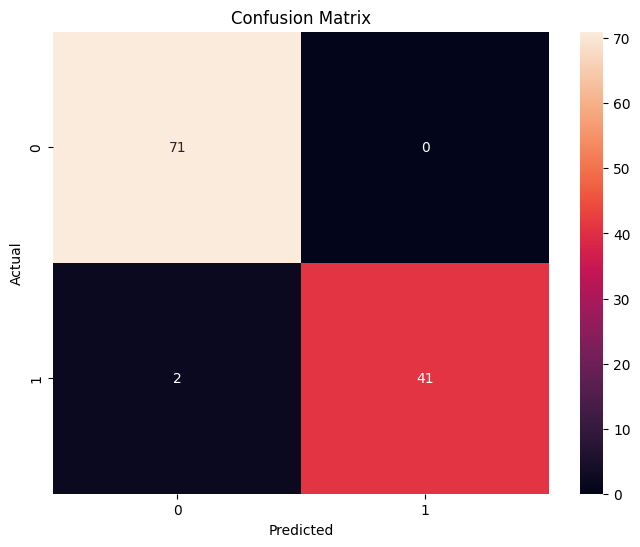

              precision    recall  f1-score   support

     Benigno       0.97      1.00      0.99        71
     Maligno       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Acurácia Balanceada: 0.9767441860465116
Precisão: 1.0
F1 Score: 0.9761904761904763
Recall: 0.9534883720930233


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from io import StringIO
from google.colab import files

# Solicitar ao usuário o arquivo CSV
print("Por favor, faça o upload do arquivo CSV:")
uploaded = files.upload()

# Carregue os dados do arquivo CSV
file_name = list(uploaded.keys())[0]
data = StringIO(uploaded[file_name].decode('utf-8'))

# Colunas do conjunto de dados
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]

# Carregue os dados em um DataFrame do pandas
dataset = pd.read_csv(data, header=None, names=columns)

# Remova a coluna de ID, pois não é informativa para o modelo
dataset.drop("ID", axis=1, inplace=True)

# Mapeie rótulos de diagnóstico (M = Maligno, B = Benigno) para valores binários (1, 0)
dataset["Diagnosis"] = dataset["Diagnosis"].map({"M": 1, "B": 0})

# Divida os dados em recursos (X) e rótulos (y)
X = dataset.drop("Diagnosis", axis=1)
y = dataset["Diagnosis"]

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronize os recursos (isso é importante para redes neurais)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**************************************************************************************************************

# Crie um modelo de rede neural mais densa
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),  # Nova camada interna
    layers.Dense(8, activation='relu'),   # Nova camada interna
    layers.Dense(1, activation='sigmoid')  # Saída binária (por exemplo, se é positivo ou negativo)
])

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treine o modelo com 100 épocas
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

#***************************************************************************************************************

# Avalie o modelo no conjunto de testes
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Converte as probabilidades em previsões binárias

# Exiba a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Exiba um relatório de classificação
class_names = ["Benigno", "Maligno"]
print(classification_report(y_test, y_pred, target_names=class_names))

# Métricas adicionais
balanced_acc = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Acurácia Balanceada: {balanced_acc}')
print(f'Precisão: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')


#Agora Thayanne, este código tem que fazer as alterações conforme senário do desenvolvimento de sua pesquisa acadêmica científica, alterando os hiperparametros da rede neural artificial bem como também verificar se a rede neural está ouverfitando ou anderfitando usando para isso técnicas específicas.

#Espero ter contribuido e ajudado.
#Grande abraço.